[304.08080006  -2.05542338  -1.22669351]
[278.50346939  -2.02024164  -1.45101534]
[211.12897109  -1.89538434  -1.74375071]


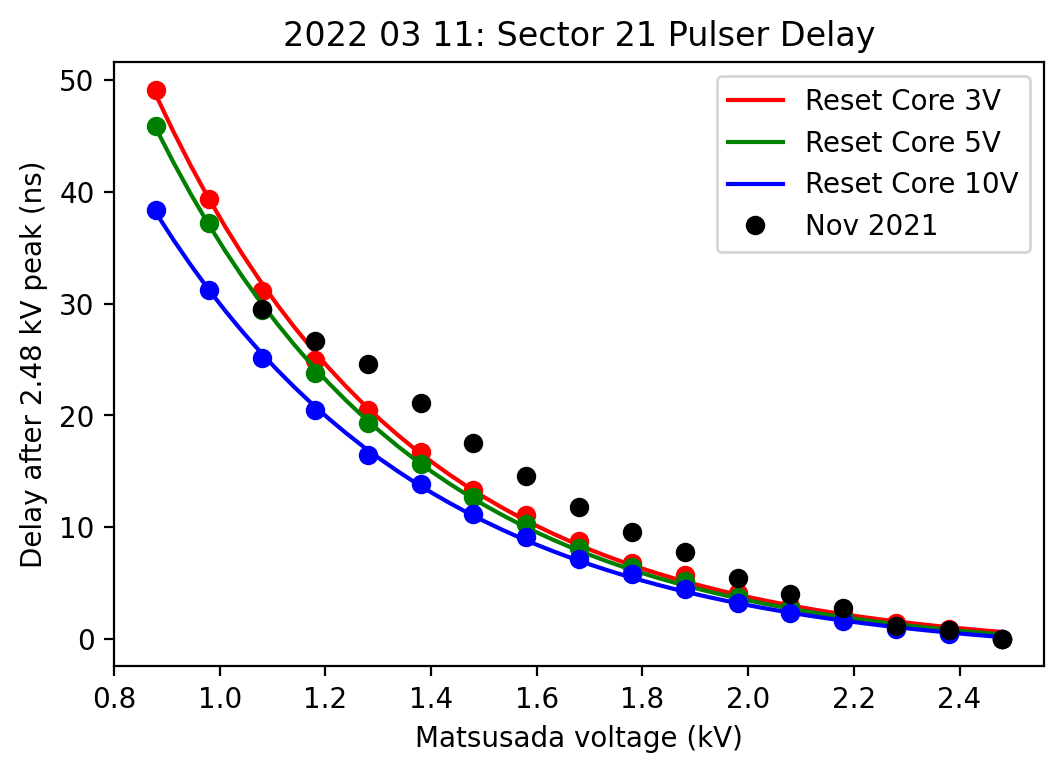

In [39]:
import numpy
import os
import h5py
from matplotlib import pyplot
from scipy.optimize import curve_fit

figure, axis = pyplot.subplots(dpi = 200)

x_input = [2.48, 2.38, 2.28, 2.18, 2.08, 1.98, 1.88, 1.78, 1.68, 1.58, 1.48, 1.38, 1.28, 1.18, 1.08, 0.98, 0.88]

y_delay_3v = [0, 0.85, 1.4, 2.25, 2.95, 4.15, 5.7, 6.8, 8.8, 11.05, 13.35, 16.75, 20.5, 25, 31.125, 39.375, 49.125]
y_delay_5v = [0, 0.5, 1.2, 2.1, 2.75, 3.75, 5.15, 6.45, 8.1, 10.3, 12.7, 15.7, 19.3, 23.8, 29.4, 37.25, 45.9]
y_delay_10v = [0, 0.45, 0.875, 1.575, 2.3, 3.25, 4.45, 5.8, 7.2, 9.1, 11.2, 13.85, 16.5, 20.5, 25.125, 31.25, 38.4]
y_delay_20211124 = [0, 0.8, 1.2, 2.8, 4., 5.5, 7.8, 9.55, 11.8, 14.6, 17.55, 21.1, 24.6, 26.7, 29.5]

# Fit to exponential.
def fit_exp(x, a, c, d):
    return a*numpy.exp(c*x)+d

# Fit to tanh.
def fit_tanh(x, a, b, c):
    return a * numpy.tanh(x * b) + c

def fit(func, ydel, initial_param, color, label):
    axis.plot(x_input, ydel, 'o', color = color)
    popt, pcov = curve_fit(func, x_input, ydel, p0 = initial_param)
    x_fit = numpy.linspace(0.88, 2.48)
    y_fit = func(numpy.asarray(x_fit), *popt)
    axis.plot(x_fit, y_fit, '-', color = color, label = label)
    print(str(popt))

fit(fit_exp, y_delay_3v, (1, -0.01, 0), 'r', 'Reset Core 3V') 
fit(fit_exp, y_delay_5v, (1, -0.01, 0), 'g', 'Reset Core 5V') 
fit(fit_exp, y_delay_10v, (1, -0.01, 0), 'b', 'Reset Core 10V')

axis.plot(numpy.flip(numpy.linspace(1.08, 2.48, 15)), y_delay_20211124, 'o', color = 'k', label = 'Nov 2021')

axis.set_title('2022 03 11: Sector 21 Pulser Delay')
axis.set_xlabel('Matsusada voltage (kV)')
axis.set_ylabel('Delay after 2.48 kV peak (ns)')
axis.legend()

Reset Core 10V: $$\Large 211.12897109e^{-1.89538434x - 1.74375071}$$